In [1]:
import os, pickle
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def find_modality_bin_behavior(a_path, db_file_name):
    """
    Finds modality, bins, behavior by using `path` and `dataset` file name

    :param a_path: Dataset path
    :param db_file_name: Dataset file name

    :return: modality, bins, behavior
    """

    modality = a_path.split(os.sep)[1].split("_")[0].capitalize()
    bins = a_path.split(os.sep)[1].split("_")[1]

    if modality == "Proprioception":
        modality = "Haptic"

    if (db_file_name.split(".")[0].split("_")[0]) == 'low':
        behavior = "Drop"
    else:
        behavior = db_file_name.split(".")[0].split("_")[0].capitalize()

    if behavior == "Crush":
        behavior = 'Press'

    return modality, bins, behavior

def read_dataset(a_path, db_file_name):
    """
    Read dataset

    :param a_path: Dataset path
    :param db_file_name: Dataset file name

    :return: interaction_data, category_labels, object_labels
    """

    bin_file = open(a_path + os.sep + db_file_name, "rb")
    interaction_data = pickle.load(bin_file)
    category_labels = pickle.load(bin_file)
    object_labels = pickle.load(bin_file)
    bin_file.close()

    return reshape_full_data(interaction_data), reshape_full_data(category_labels), reshape_full_data(object_labels)

def reshape_full_data(data):
    """
    Reshape data into (Categories, Objects, Trials)

    :param data: Dataset list

    :return: reshaped Dataset list
    """
    return data.reshape(NUM_OF_CATEGORY, OBJECTS_PER_CATEGORY, TRIALS_PER_OBJECT, -1)


def print_discretized_data(data, x_values, y_values, modality, behavior, file_path=None):
    """
    prints the data point and save it

    :param data: one data point
    :param x_values: temporal bins
    :param y_values:
    :param modality:
    :param behavior:
    :param file_path:

    :return:
    """
    
    data = data.reshape(x_values, y_values)

    title_name = behavior+"-"+modality+" Features"
    plt.title(title_name, fontsize=16)
    plt.xlabel("Temporal Bins", fontsize=16)

    if modality == 'Haptic':
        plt.imshow(data.T, cmap=plt.cm.gray)
        y_label = "Joints"
    elif modality == 'Audio':
        plt.imshow(np.flipud(data.T), cmap=plt.cm.gray)
        y_label = "Frequency Bins"
    else:
        y_label = ""
    plt.ylabel(y_label, fontsize=16)

    ax = plt.gca()
    ax.set_xticks(np.arange(0, x_values, 1))
    ax.set_yticks(np.arange(0, y_values, 1))
    ax.set_xticklabels(np.arange(1, x_values + 1, 1))
    ax.set_yticklabels(np.arange(1, y_values + 1, 1))

    plt.colorbar()

    plt.show()
    plt.close()

In [3]:
# Source Robot data
a_path1 = "Datasets"+os.sep+"audio_10x10_datasets"
db_file_name1 = "shake_audio.bin"

# Target Robot data
a_path2 = "Datasets"+os.sep+"proprioception_10x10_datasets"
db_file_name2 = "hold_proprioception_10bin_features.bin"

CATEGORY_LABELS = {'cup': 8, 'timber': 17, 'bottle': 4, 'tin': 18, 'ball': 1, 'weight': 20, 'eggcoloringcup': 9, 'basket': 2, 'cone': 7, 'cannedfood': 6, 'noodle': 13, 'egg': 10, 'medicine': 11, 'pvc': 15, 'can': 5, 'pasta': 14, 'tupperware': 19, 'bigstuffedanimal': 3, 'smallstuffedanimal': 16, 'metal': 12}
OBJECT_LABELS = {'cup_yellow': 40, 'basket_handle': 9, 'pvc_1': 71, 'smallstuffedanimal_moose': 79, 'smallstuffedanimal_headband_bear': 78, 'noodle_2': 62, 'timber_square': 84, 'tupperware_ground_coffee': 92, 'medicine_calcium': 54, 'basket_cylinder': 6, 'egg_cardboard': 46, 'cannedfood_tomato_paste': 30, 'egg_smooth_styrofoam': 49, 'noodle_1': 61, 'basket_funnel': 7, 'can_starbucks': 25, 'weight_3': 98, 'cone_2': 32, 'weight_2': 97, 'bottle_red': 19, 'medicine_aspirin': 52, 'eggcoloringcup_orange': 43, 'bottle_green': 18, 'egg_wood': 50, 'egg_plastic_wrap': 47, 'noodle_3': 63, 'timber_squiggle': 85, 'pasta_pipette': 69, 'noodle_5': 65, 'cannedfood_tomatoes': 29, 'pasta_cremette': 66, 'ball_transparent': 4, 'ball_basket': 2, 'tupperware_coffee_beans': 91, 'metal_thermos': 60, 'bottle_google': 17, 'smallstuffedanimal_otter': 80, 'tin_tea': 90, 'eggcoloringcup_blue': 41, 'tupperware_pasta': 94, 'cup_blue': 36, 'egg_rough_styrofoam': 48, 'bigstuffedanimal_tan_dog': 15, 'timber_semicircle': 83, 'eggcoloringcup_pink': 44, 'cone_5': 35, 'timber_rectangle': 82, 'cannedfood_cowboy_cookout': 27, 'noodle_4': 64, 'tupperware_marbles': 93, 'cone_3': 33, 'pasta_penne': 68, 'pasta_rotini': 70, 'bigstuffedanimal_pink_dog': 14, 'cannedfood_soup': 28, 'tin_snowman': 89, 'metal_flower_cylinder': 56, 'eggcoloringcup_yellow': 45, 'weight_4': 99, 'cup_metal': 38, 'weight_5': 100, 'bigstuffedanimal_frog': 13, 'medicine_ampicillin': 51, 'smallstuffedanimal_bunny': 76, 'cone_4': 34, 'tin_poker': 87, 'can_red_bull_small': 24, 'cannedfood_chili': 26, 'ball_blue': 3, 'smallstuffedanimal_chick': 77, 'ball_base': 1, 'pvc_4': 74, 'medicine_bilberry_extract': 53, 'pvc_2': 72, 'timber_pentagon': 81, 'medicine_flaxseed_oil': 55, 'cup_isu': 37, 'metal_tea_jar': 59, 'ball_yellow_purple': 5, 'cone_1': 31, 'metal_food_can': 57, 'metal_mix_covered_cup': 58, 'tin_pokemon': 86, 'can_arizona': 21, 'bigstuffedanimal_bear': 11, 'can_red_bull_large': 23, 'tupperware_rice': 95, 'bigstuffedanimal_bunny': 12, 'can_coke': 22, 'eggcoloringcup_green': 42, 'pasta_macaroni': 67, 'basket_green': 8, 'pvc_5': 75, 'basket_semicircle': 10, 'tin_snack_depot': 88, 'bottle_sobe': 20, 'weight_1': 96, 'pvc_3': 73, 'cup_paper_green': 39, 'bottle_fuse': 16}

NUM_OF_CATEGORY = len(CATEGORY_LABELS)
OBJECTS_PER_CATEGORY = 5
TRIALS_PER_OBJECT = 5

In [4]:
modality1, bins1, behavior1 = find_modality_bin_behavior(a_path1, db_file_name1)
print("Source Robot data: ", behavior1, modality1)
interaction_data_1, category_labels_1, object_labels_1 = read_dataset(a_path1, db_file_name1)
num_of_features_1 = interaction_data_1.shape[-1]
print("categories, objects, trials, features:", interaction_data_1.shape)

print("")

modality2, bins2, behavior2 = find_modality_bin_behavior(a_path2, db_file_name2)
print("Target Robot data: ", behavior2, modality2)
interaction_data_2, category_labels_2, object_labels_2 = read_dataset(a_path2, db_file_name2)
num_of_features_2 = interaction_data_2.shape[-1]
print("categories, objects, trials, features:", interaction_data_2.shape)

Source Robot data:  Shake Audio
categories, objects, trials, features: (20, 5, 5, 100)

Target Robot data:  Hold Haptic
categories, objects, trials, features: (20, 5, 5, 70)


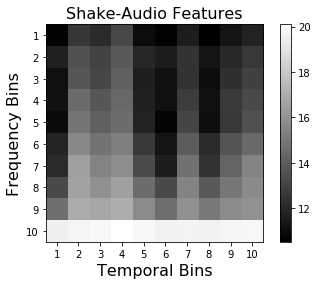

Cat label:  weight
Obj label:  weight_2


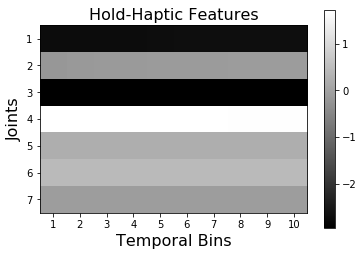

Cat label:  basket
Obj label:  basket_funnel


In [6]:
cat, obj, tri = 19, 1, 1
x_values = 10 # temporal bins
y_values = num_of_features_1//x_values
modality, behavior = modality1, behavior1
print_discretized_data(interaction_data_1[cat][obj][tri], x_values, y_values, modality, behavior, file_path=None)
cat_lab = category_labels_1[cat][obj][tri]
obj_lab = object_labels_1[cat][obj][tri]
print("Category label: ", list(CATEGORY_LABELS.keys())[list(CATEGORY_LABELS.values()).index(cat_lab)])
print("Object label: ", list(OBJECT_LABELS.keys())[list(OBJECT_LABELS.values()).index(obj_lab)])

cat, obj, tri = 1, 1, 1
x_values = 10 # temporal bins
y_values = num_of_features_2//x_values
modality, behavior = modality2, behavior2
print_discretized_data(interaction_data_2[cat][obj][tri], x_values, y_values, modality, behavior, file_path=None)
cat_lab = category_labels_1[cat][obj][tri]
obj_lab = object_labels_1[cat][obj][tri]
print("Category label: ", list(CATEGORY_LABELS.keys())[list(CATEGORY_LABELS.values()).index(cat_lab)])
print("Object label: ", list(OBJECT_LABELS.keys())[list(OBJECT_LABELS.values()).index(obj_lab)])